In [39]:
import numpy

def energy(occupied):
    epsilon =-1
    U = 0
    for i, site1 in enumerate(occupied[:-1]): #all but the last!
        for site2 in occupied[i+1:]: #from the i+1th to the last!
            if numpy.absolute(site1-site2)==1:
                U+=epsilon
    return U

def trial_move(occupied,lattice,T):
    Uo = energy(occupied)
    #pick a particle at random
    numpy.random.shuffle(occupied) #shuffles the elements of occupied
    old = occupied[0]
    #pick an EMPTY place at random to move it to
    empty_mask = numpy.isin(numpy.arange(V),occupied,invert=True)
    empty_sites = numpy.arange(V)[empty_mask] # list of empty sites
    new = empty_sites[numpy.random.randint(len(empty_sites))]
    occupied[0]= new
    #if energy down, accept
    Un = energy(occupied)
    #if energy up and random < boltzmann weight, accept
    if (Un<=Uo) or numpy.random.random() < numpy.exp(-(Un-Uo)/T):
        lattice[old] = 0
        lattice[new] = 1
        return occupied, lattice, Un
    #otherwise reject
    occupied[0]=old
    return occupied, lattice, Uo

#make our MC simulation!
def run(nsteps,T,occupied, lattice):
    U = []
    for step in range(nsteps):
        occupied, lattice, u = trial_move(occupied, lattice,T)
        U.append(u)
        if step%50==0:
            print(step,lattice)
    return numpy.array(U)/N

0 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
50 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
-0.6716666666666664


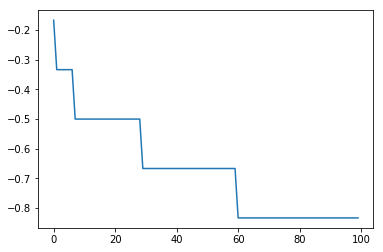

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
V = 20 #number of sites in our volume
N = 6 # number of particles
lattice = numpy.zeros(V)#Initialize empty lattice
occupied = numpy.random.choice(V,N,replace=False)
for site in occupied:
    lattice[site] = 1

U = run(100,0.1,occupied, lattice)
plt.plot(U)
print(numpy.average(U))